<a href="https://colab.research.google.com/github/strathpaulkirkland/DM996/blob/master/Completed_DM996_ANN_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro to Deep Learning Lab**

In this lab we are going to basically fork an exisiting DL basics introduction and find out the issues with doing so. Enabling you to troubleshoot these issue later in the class yourself. 
Along with that by the end of this lab you should be able to build a NN to solve classification tasks.


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Test to see if the instance is up and running correctly, checking both the CPU instance and GPU instance.

In [ ]:
!cat /proc/cpuinfo # gives details of CPU

!nvidia-smi # gives details of GPU


processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes

## Part 0: Prerequisites:

We recommend that you run this this notebook in the cloud on Google Colab (see link with icon at the top) if you're not already doing so. It's the simplest way to get started. You can also [install TensorFlow locally](https://www.tensorflow.org/install/). But, again, simple is best (with caveats):

[tf.keras](https://www.tensorflow.org/guide/keras) is the simplest way to build and train neural network models in TensorFlow. So, that's what we'll stick with in this tutorial, unless the models neccessitate a lower-level API.

Note that there's [tf.keras](https://www.tensorflow.org/guide/keras) (comes with TensorFlow) and there's [Keras](https://keras.io/) (standalone). You should be using [tf.keras](https://www.tensorflow.org/guide/keras) because (1) it comes with TensorFlow so you don't need to install anything extra and (2) it comes with powerful TensorFlow-specific features.

In [ ]:
# !pip uninstall tensorflow  #just incase you want to change version
# !pip install tensorflow==2.X.0
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import IPython


print(tf.__version__)

2.9.2


## Part 1: Generic Simple ANN:
### Boston Housing Price Prediction with Feed Forward Neural Networks

Let's start with using a fully-connected neural network to do predict housing prices. The following image highlights the difference between regression and classification (see part 2). Given an observation as input, **regression** outputs a continuous value (e.g., exact temperature) and classificaiton outputs a class/category that the observation belongs to.

<img src="https://i.imgur.com/vvSoAzg.jpg" alt="classification_regression" width="400"/>

For the Boston housing dataset, we get 506 rows of data, with 13 features in each. Our task is to build a regression model that takes these 13 features as input and output a single value prediction of the "median value of owner-occupied homes (in $1000)."

Now, we load the dataset. Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

In [ ]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

57026/57026 [==============================] - 0s 0us/step


### Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. First we stack a few layers together using `keras.Sequential`. Next we configure the loss function, optimizer, and metrics to monitor. These are added during the model's compile step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps.

Let's build a network with 1 hidden layer of 20 neurons, and use mean squared error (MSE) as the loss function (most common one for regression problems):

In [ ]:
def build_model():
    model = keras.Sequential([
        Dense(20, activation=tf.nn.relu, input_shape=[len(train_features[0])]),
        Dense(1)
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(), 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_features` and `train_labels` arrays.
2. The model learns to associate features and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_features` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [ ]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=1, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................
Final Root Mean Square Error on validation set: 2.306


# Oh no, we have run into our first problem...

AttributeError: module 'tensorflow._api.v2.train' has no attribute 'AdamOptimizer'

go to [Tensorflow-Keras](https://www.tensorflow.org/api_docs/python/tf) to see what the problem is with tf.train...

oh yeah it doesn't exist anymore (clearly this example was older)
It has since been update to be within tf.keras.optimizers

**Replace the tf.train.AdamOptimizer() in the build_model() function with an approriate Adam one found on the tensor flow site**

Rerun this model then the training script again, we will find another issue.

# Error 2

KeyError: 'val_mean_squared_error'
What does that mean

It is suggesting that the line, seen below, has an error

```
rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
```

it is looking for that value inside hist that is called val_mean_squared_error

call the hist variable to see a print out of this variable


In [ ]:
hist


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,593.099182,22.399485,593.099182,497.927246,21.328655,497.927246,0
1,580.983582,22.172125,580.983582,486.841095,21.096554,486.841095,1
2,569.159668,21.945278,569.159668,475.887726,20.863678,475.887726,2
3,557.526917,21.719774,557.526917,464.682983,20.622210,464.682983,3
4,545.554077,21.484524,545.554077,452.994751,20.367119,452.994751,4
...,...,...,...,...,...,...,...
929,6.082342,1.675305,6.082342,5.361224,1.885307,5.361224,929
930,6.096384,1.670937,6.096384,5.294168,1.873091,5.294168,930
931,6.090539,1.667539,6.090539,5.320749,1.876449,5.320749,931
932,6.083420,1.668239,6.083420,5.367880,1.880387,5.367880,932


Not that there is no val_mean_squared_error only a val mse.
**Correct the above code and rerun.**

In [ ]:
# rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
# print()
# print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))

Now, let's plot the loss function measure on the training and validation sets. The validation set is used to prevent overfitting ([learn more about it here](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)). However, because our network is small, the training convergence without noticeably overfitting the data as the plot shows.

In [ ]:
# def plot_history():
#     plt.figure()
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
#     plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val Error')
#     plt.legend()
#     plt.ylim([0,50])

# plot_history()

Again we have an issue with the code and the naming of the mse terms replace the two above with mse

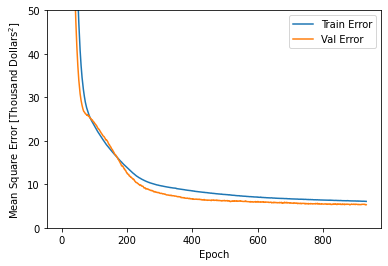

In [ ]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,50])

plot_history()

Next, compare how the model performs on the test dataset:

In [ ]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 4ms/step - loss: 17.0601 - mae: 2.7213 - mse: 17.0601
Root Mean Square Error on test set: 4.13


Compare the RMSE measure you get to the [Kaggle leaderboard](https://www.kaggle.com/c/boston-housing/leaderboard). An RMSE of 4 puts us in 20th place.

## Improving the results
Change the number of neurons from 20 to a higher and lower value and note the changes.

Similairly change the optimizer to see if you can improve your result.

See if you can find how to add learning rate modifications to the model, if not this will be covered in the next lab.











---





---





---

